In [2]:
%matplotlib inline

In [45]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import os
import seaborn as sn

In [4]:
# Load in file
file_path = os.path.join(os.getcwd(),'tracks.csv')
tracks_df = pd.read_csv(file_path)
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
# Clean and format data 
clean_df = tracks_df[['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists', 'release_date', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
'liveness', 'valence', 'tempo']]
clean_df.head()

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],1922-02-22,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220


In [50]:
correlation_df = clean_df[['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
'liveness', 'valence', 'tempo']]
correlation_df.head()

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6,126903,0,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851
1,0,98200,0,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009
2,0,181640,0,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418
3,0,176907,0,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980
4,0,163080,0,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220


In [54]:
corrMatrix = correlation_df.corr()
corrMatrix

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,0.027681,0.211758,0.187000,0.302315,0.327028,-0.047357,-0.370882,-0.236487,-0.048740,0.004643,0.071364
duration_ms,0.027681,1.000000,-0.016747,-0.120371,0.024825,0.000337,-0.125771,-0.064434,0.069278,0.002137,-0.163202,-0.001210
explicit,0.211758,-0.016747,1.000000,0.150229,0.123076,0.134603,0.102258,-0.149018,-0.067520,-0.013114,-0.016539,0.005745
danceability,0.187000,-0.120371,0.150229,1.000000,0.241563,0.251436,0.199310,-0.242951,-0.225900,-0.106168,0.528150,-0.040783
energy,0.302315,0.024825,0.123076,0.241563,1.000000,0.764735,-0.053506,-0.715412,-0.195839,0.124632,0.372276,0.230099
loudness,0.327028,0.000337,0.134603,0.251436,0.764735,1.000000,-0.167112,-0.519423,-0.329306,0.029529,0.275448,0.189288
speechiness,-0.047357,-0.125771,0.102258,0.199310,-0.053506,-0.167112,1.000000,0.069060,-0.102440,0.207047,0.046501,-0.086911
acousticness,-0.370882,-0.064434,-0.149018,-0.242951,-0.715412,-0.519423,0.069060,1.000000,0.204412,-0.004738,-0.180939,-0.195235
instrumentalness,-0.236487,0.069278,-0.067520,-0.225900,-0.195839,-0.329306,-0.102440,0.204412,1.000000,-0.038848,-0.175226,-0.055477
liveness,-0.048740,0.002137,-0.013114,-0.106168,0.124632,0.029529,0.207047,-0.004738,-0.038848,1.000000,-0.000034,-0.014912


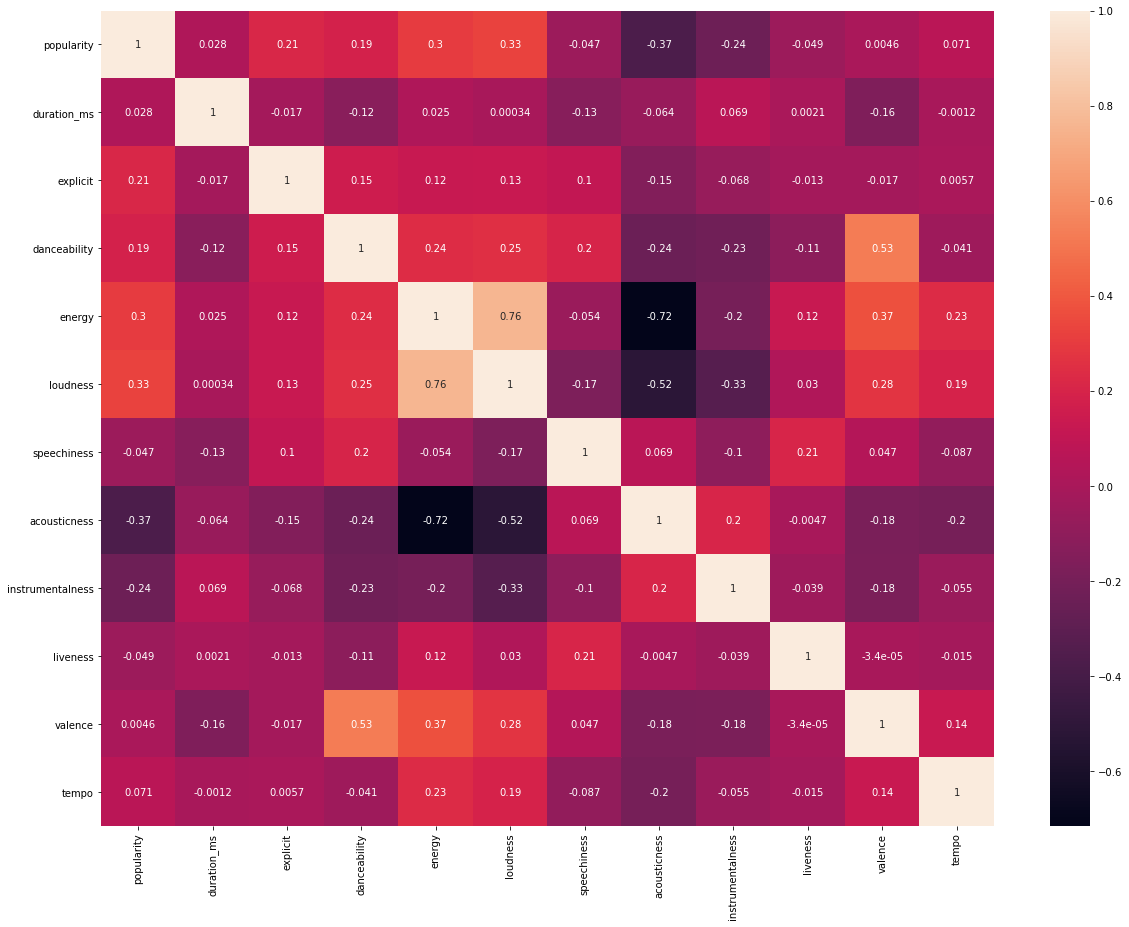

In [73]:
plt.subplots(figsize=(20,15))
sn.heatmap(corrMatrix, annot=True)  
plt.savefig("CorrelationHeatMap.png")
plt.show()

In [13]:
explicit_tracks_df = tracks_df[tracks_df["explicit"] == 1]
explicit_tracks_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
403,2l56fKIIrgfHWndcbkBAta,The C00L Song,0,120309,1,['Dampfwalzi'],['41GUFwc0gpqt495qHXpxFB'],1923-02-26,0.503,0.823,9,-12.871,0,0.0640,0.000243,0.640000,0.473,0.4010,97.019,4
1054,6cnXo1yNldoXghTkWSshkW,En Concreto,0,185481,1,['Hot Doggo'],['5oHqWQeXiITZ7NP1MSN79N'],1924-03-03,0.739,0.789,7,-7.272,1,0.1780,0.382000,0.001070,0.116,0.6570,90.040,4
2949,0UU8y5xicqUQvaJSppEyOx,Smooth as Sade,0,191112,1,['Numba 9'],['3Gyi5qhR9LAJ6VP9JskBSa'],1927,0.824,0.363,7,-8.937,1,0.3500,0.042900,0.000099,0.370,0.7300,165.001,4
2964,0cpkqvPmf7kNmmvPYZjMwH,Trash Bags of That Sour,0,278622,1,['Numba 9'],['3Gyi5qhR9LAJ6VP9JskBSa'],1927,0.630,0.723,0,-3.529,1,0.0490,0.023500,0.000017,0.186,0.0949,156.888,4
2967,0dHWUBSmoHz956UurOZ9Ua,Higher Power Part Duece,0,231863,1,['Numba 9'],['3Gyi5qhR9LAJ6VP9JskBSa'],1927,0.609,0.503,6,-8.685,1,0.3920,0.198000,0.000064,0.178,0.5660,173.951,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586209,31QNVeqYZm3lQQcZMTgwC0,Shanty,10,150013,1,['The Quests'],['4AOgY5YwQw4d5pgEX3f56A'],1996-02-16,0.462,0.525,0,-8.253,1,0.0381,0.422000,0.872000,0.156,0.5580,123.876,4
586383,5wTMQjEx9LWeFwLjolPCUy,What's My Age Again?,33,148507,1,['blink-182'],['6FBDaR13swtiWwGhX1WQsP'],2007-11-12,0.398,0.945,6,-7.535,1,0.0700,0.012800,0.000234,0.171,0.5340,157.763,4
586422,77V0TWycxV4wuhcip5LF3X,Sexy Bitch (feat. Akon),37,195853,1,"['David Guetta', 'Akon']","['1Cs0zKBU1kc0i8ypK3B9ai', '0z4gvV4rjIZ9wHck67...",2009,0.814,0.626,11,-5.019,0,0.0447,0.075700,0.000739,0.111,0.8160,130.028,4
586444,0fzbGFozA92t0Grw3qw6EB,STARSTRUKK (feat. Katy Perry),43,202667,1,"['3OH!3', 'Matt Squire']","['0FWzNDaEu9jdgcYTbcOa4F', '3Pk9L2rUT7wj7queJv...",2010-06-25,0.607,0.805,11,-5.579,0,0.0608,0.001750,0.000000,0.231,0.2320,139.894,4


In [14]:
pop_explicit_tracks = explicit_tracks_df["popularity"].mean()
pop_explicit_tracks

45.6844262295082

In [15]:
non_explicit_tracks_df = tracks_df[tracks_df["explicit"] == 0]
non_explicit_tracks_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [16]:
pop_non_explicit_tracks = non_explicit_tracks_df["popularity"].mean()
pop_non_explicit_tracks

26.73463288683471

In [17]:
explicit = ["Yes", "No"]
popularity = [45.68, 26.73]
x_axis = np.arange(len(popularity))

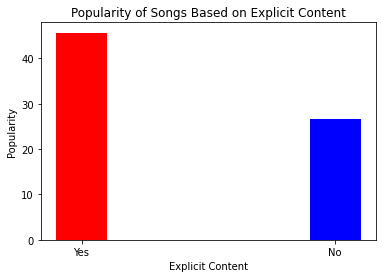

In [18]:
# Create a bar chart based upon the above data
plt.bar(x_axis, popularity, width=0.2, color=["red","blue"], tick_label=["Yes", "No"], align="center")
plt.title("Popularity of Songs Based on Explicit Content")
plt.xlabel("Explicit Content")
plt.ylabel("Popularity")
plt.savefig("PopvsExplicit.png")

In [19]:
## Number of songs an artist comes out with vs. popularity

In [20]:
# load in genre file
file_path_genre = os.path.join(os.getcwd(),'genres_v2.csv')
genre_df = pd.read_csv(file_path_genre)
genre_df.head()
genre_df.tail()

/Users/deterding.lydia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.394,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.383,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.124,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.488,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle
42304,0.529,0.945,9,-5.862,1,0.0615,0.001890,0.000055,0.4140,0.134,...,6MAAMZImxcvYhRnxDLTufD,spotify:track:6MAAMZImxcvYhRnxDLTufD,https://api.spotify.com/v1/tracks/6MAAMZImxcvY...,https://api.spotify.com/v1/audio-analysis/6MAA...,162161,4,hardstyle,NaN,20999.0,Best of Hardstyle 2020


In [21]:
clean_genre_df = genre_df.loc[:, ["danceability", "energy", "loudness",
                                    "id", "genre", "song_name"]]
clean_genre_df

,danceability,energy,loudness,id,genre,song_name
0,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.719,0.493,-7.230,7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,0.850,0.893,-4.783,0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,0.476,0.781,-4.710,0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,-7.668,4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...
42300,0.528,0.693,-5.148,46bXU7Sgj7104ZoXxzz9tM,hardstyle,NaN
42301,0.517,0.768,-7.922,0he2ViGMUO3ajKTxLOfWVT,hardstyle,NaN
42302,0.361,0.821,-3.102,72DAt9Lbpy9EUS29OzQLob,hardstyle,NaN
42303,0.477,0.921,-4.777,6HXgExFVuE1c3cq9QjFCcU,hardstyle,NaN


In [22]:
# Lydia Combine original dataset with genre dataset and clean (combine on id and delete unused columns)
#genre_v2.
#tracks.csv
combined_spotify_df = pd.merge(clean_genre_df, clean_df, how='outer', on='id')
combined_spotify_df

,danceability_x,energy_x,loudness_x,id,genre,song_name,name,popularity,duration_ms,explicit,...,release_date,danceability_y,energy_y,loudness_y,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
1,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Underground Rap,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
2,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Trap Metal,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
3,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Rap,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
4,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Hiphop,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624902,NaN,NaN,NaN,5rgu12WBIHQtvej2MdHSH0,NaN,NaN,云与海,50.0,258267.0,0.0,...,2020-09-26,0.560,0.518,-7.471,0.0292,0.7850,0.000000,0.0648,0.2110,131.896
624903,NaN,NaN,NaN,0NuWgxEp51CutD2pJoF4OM,NaN,NaN,blind,72.0,153293.0,0.0,...,2020-10-21,0.765,0.663,-5.223,0.0652,0.1410,0.000297,0.0924,0.6860,150.091
624904,NaN,NaN,NaN,27Y1N4Q4U3EfDU5Ubw8ws2,NaN,NaN,What They'll Say About Us,70.0,187601.0,0.0,...,2020-09-02,0.535,0.314,-12.823,0.0408,0.8950,0.000150,0.0874,0.0663,145.095
624905,NaN,NaN,NaN,45XJsGpFTyzbzeWK8VzR8S,NaN,NaN,A Day At A Time,58.0,142003.0,0.0,...,2021-03-05,0.696,0.615,-6.212,0.0345,0.2060,0.000003,0.3050,0.4380,90.029


In [23]:
combined_spotify_df = combined_spotify_df.dropna(how = 'any')
combined_spotify_df

,danceability_x,energy_x,loudness_x,id,genre,song_name,name,popularity,duration_ms,explicit,...,release_date,danceability_y,energy_y,loudness_y,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.0598,0.01340,0.0556,0.389,156.985
1,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Underground Rap,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.0598,0.01340,0.0556,0.389,156.985
2,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Trap Metal,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.0598,0.01340,0.0556,0.389,156.985
3,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Rap,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.0598,0.01340,0.0556,0.389,156.985
4,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Hiphop,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.0598,0.01340,0.0556,0.389,156.985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21524,0.823,0.818,-4.396,7uJvH1U5rhQBEwJILAyA3D,Hiphop,Write This Down (feat. Nieve),Write This Down (feat. Nieve),72.0,189427.0,0.0,...,2010-11-17,0.823,0.818,-4.396,0.1800,0.1730,0.01360,0.2100,0.844,92.973
21526,0.590,0.735,-4.924,1E8wif6bVXurUgxV8Gfwrw,Hiphop,Gangsta Luv,Gangsta Luv,52.0,256547.0,0.0,...,2009-01-01,0.590,0.735,-4.924,0.2970,0.0277,0.00000,0.0818,0.398,102.076
21527,0.701,0.760,-6.561,0prF3F4FoKvxBObaeXLVHv,Hiphop,When I'm Gone,When I'm Gone,58.0,248560.0,1.0,...,2011-03-29,0.701,0.760,-6.561,0.0512,0.4960,0.00000,0.0867,0.301,91.986
21528,0.697,0.621,-6.886,2sLwPnIP3CUVmIuHranJZU,Hiphop,Wiggle (feat. Snoop Dogg),Wiggle (feat. Snoop Dogg),61.0,193296.0,0.0,...,2013-09-10,0.697,0.621,-6.886,0.2500,0.0802,0.00000,0.1620,0.721,81.946


In [64]:
# Does the song genre relate to popularity? -- group by genre, find mean, create bar chart (x-axis genre, y-axis popularity)
combined_spotify_genre_df = combined_spotify_df.groupby("genre")
combined_spotify_genre_df.head()

,danceability_x,energy_x,loudness_x,id,genre,song_name,name,popularity,duration_ms,explicit,...,release_date,danceability_y,energy_y,loudness_y,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.059800,0.013400,0.0556,0.3890,156.985
1,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Underground Rap,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.059800,0.013400,0.0556,0.3890,156.985
2,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Trap Metal,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.059800,0.013400,0.0556,0.3890,156.985
3,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Rap,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.059800,0.013400,0.0556,0.3890,156.985
4,0.831,0.814,-7.364,2Vc6NJ9PW9gD9q343XFRKx,Hiphop,Mercury: Retrograde,Mercury: Retrograde,75.0,124539.0,1.0,...,2017-09-05,0.831,0.814,-7.364,0.4200,0.059800,0.013400,0.0556,0.3890,156.985
23,0.893,0.907,-10.406,2ggqfj97qyiORmXoVFzP5j,Dark Trap,Andromeda,Andromeda,63.0,121979.0,1.0,...,2016-11-14,0.893,0.907,-10.406,0.3670,0.152000,0.031100,0.5580,0.3020,99.971
24,0.893,0.907,-10.406,2ggqfj97qyiORmXoVFzP5j,Underground Rap,Andromeda,Andromeda,63.0,121979.0,1.0,...,2016-11-14,0.893,0.907,-10.406,0.3670,0.152000,0.031100,0.5580,0.3020,99.971
25,0.893,0.907,-10.406,2ggqfj97qyiORmXoVFzP5j,Trap Metal,Andromeda,Andromeda,63.0,121979.0,1.0,...,2016-11-14,0.893,0.907,-10.406,0.3670,0.152000,0.031100,0.5580,0.3020,99.971
29,0.825,0.761,-5.389,5o7ZDvfOry1MNhNLBOJulo,Dark Trap,1000 Rounds,1000 Rounds,71.0,163371.0,1.0,...,2017-03-20,0.825,0.761,-5.389,0.1040,0.011100,0.003590,0.3340,0.1610,149.970
30,0.825,0.761,-5.389,5o7ZDvfOry1MNhNLBOJulo,Underground Rap,1000 Rounds,1000 Rounds,71.0,163371.0,1.0,...,2017-03-20,0.825,0.761,-5.389,0.1040,0.011100,0.003590,0.3340,0.1610,149.970


In [25]:
combined_spotify_genre_mean_df = combined_spotify_genre_df["popularity"].mean()
combined_spotify_genre_mean_df

genre
Dark Trap          67.805668
Emo                65.032808
Hiphop             63.344572
Pop                76.146825
Rap                72.406574
RnB                66.155767
Trap Metal         65.471698
Underground Rap    68.338282
Name: popularity, dtype: float64

In [68]:
genre = ["Emo", "Hiphop", "Pop", "Rap", "RnB", "Metal"]
popularity = [65.03, 63.34, 76.15, 72.41, 66.16, 65.47]
x_axis = np.arange(len(popularity))

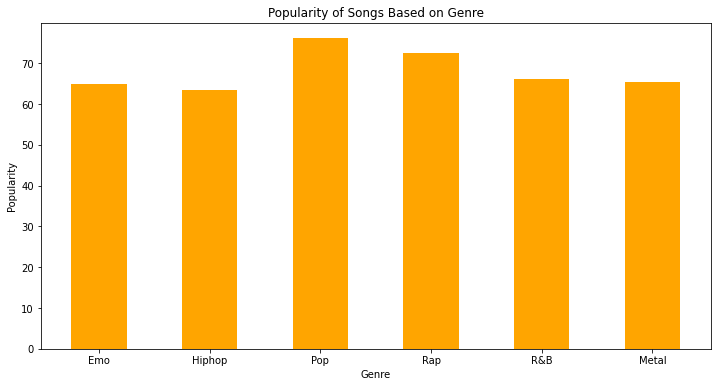

In [71]:
plt.figure(figsize=(12,6))
plt.bar(x_axis, popularity, width=0.5, color=["orange"], tick_label=["Emo", "Hiphop", "Pop", "Rap", "R&B", "Metal"], align="center")
plt.title("Popularity of Songs Based on Genre")
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.savefig("PopvsGenre.png")

In [75]:
dance_limited = clean_df.loc[clean_df['danceability'] >= 0.15, :]
dance_df = dance_limited.groupby('danceability')
dance_df.head()

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],1922-02-22,0.645,0.4450,-13.338,0.4510,0.6740,0.744000,0.1510,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,-22.136,0.9570,0.7970,0.000000,0.1480,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,-21.180,0.0512,0.9940,0.021800,0.2120,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,-27.961,0.0504,0.9950,0.918000,0.1040,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,-16.900,0.0390,0.9890,0.130000,0.3110,0.196,103.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436749,3uYQkt44U7d66hJyQx2KgO,Tchibum da Cabeça ao Bumbum,54,165053,0,['Palavra Cantada'],2012-01-01,0.984,0.4060,-9.947,0.0901,0.4010,0.000000,0.0756,0.981,119.996
509977,3jjfgpQ05jy0hoGwdaVmzH,BABÁM,40,194076,0,"['Horváth Tamás', 'Pixa']",2020-06-10,0.986,0.3230,-6.965,0.1070,0.0189,0.000284,0.0857,0.708,121.958
531968,6p1P4vLBG8vDAgNy05CCW8,Tera Suit,61,150415,0,['Tony Kakkar'],2021-03-09,0.982,0.5750,-6.168,0.0566,0.1590,0.000032,0.0655,0.676,124.976
539336,3uoEsMvgRoJH5zhuRyKWRy,Sinabmarin,50,317640,0,['Andrew E.'],2002-01-28,0.984,0.6080,-8.757,0.0553,0.0106,0.000000,0.1180,0.972,114.648


In [76]:
energy_limited = clean_df.loc[clean_df['energy'] >= 0.15, :]
energy_df = energy_limited.groupby('energy')

In [77]:
acoustic_limited = clean_df.loc[clean_df['acousticness'] >= 0.15, :]
acoustic_df = acoustic_limited.groupby('acousticness')

In [78]:
instrument_limited = clean_df.loc[clean_df['instrumentalness'] >= 0.15, :]
instrument_df = instrument_limited.groupby('instrumentalness')

In [79]:
live_limited = clean_df.loc[clean_df['liveness'] >= 0.15, :]
live_df = live_limited.groupby('liveness')


In [80]:
valence_limited = clean_df.loc[clean_df['valence'] >= 0.15, :]
valence_df = valence_limited.groupby('valence')

In [108]:
correlation_df = clean_df[['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
'liveness', 'valence', 'tempo']]
correlation_df.drop[index<0.15]

NameError: name 'index' is not defined